# Project - 7

# Customer Churn Analysis

#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
##Importing dataset
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
##Shape
data.shape

(7043, 21)

Dataset has 7043 rows and 21 columns

In [5]:
##Checking columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Churn is target variable and categorical data

In [8]:
##checking unique value
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

customerID has all unique values which can be dropped.

In [10]:
##Duplicate enteries
data.duplicated().sum()

0

No duplicate entry in the dataset

In [11]:
#Checking null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Checking nlankspace and 'NA'
data.isin([' ','NA','-']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
data['TotalCharges']= data['TotalCharges'].replace(' ',np.nan)

In [14]:
data['TotalCharges'].isin([' ','NA','-']).sum()

0

In [15]:
# Converting datatype into float

data['TotalCharges']= data['TotalCharges'].astype(float)

In [16]:
data['TotalCharges'].isna().sum()

11

In [17]:
##missing vales
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

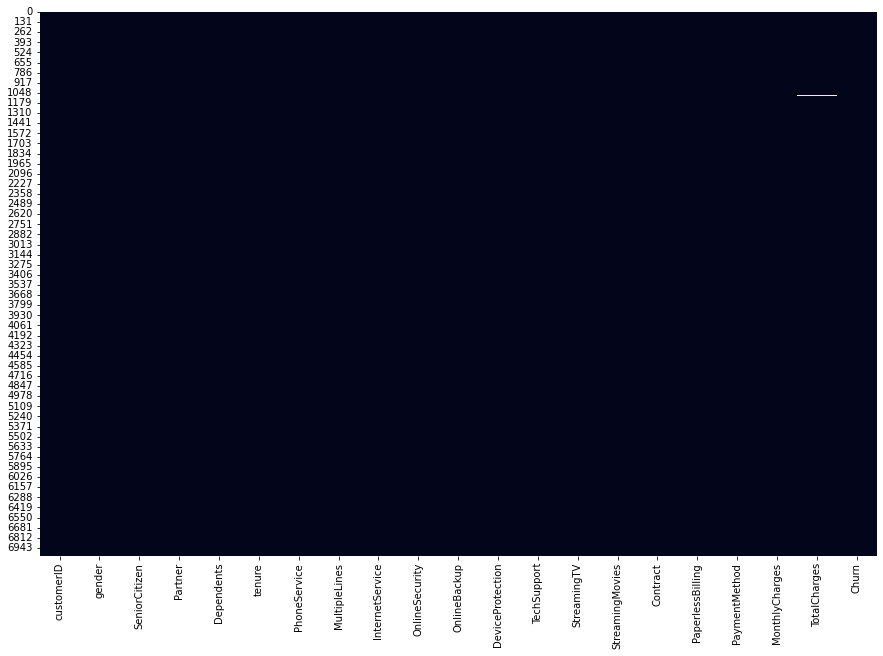

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),cbar=False)

##we can see the null values in TotalCharges column

### Null value imputation

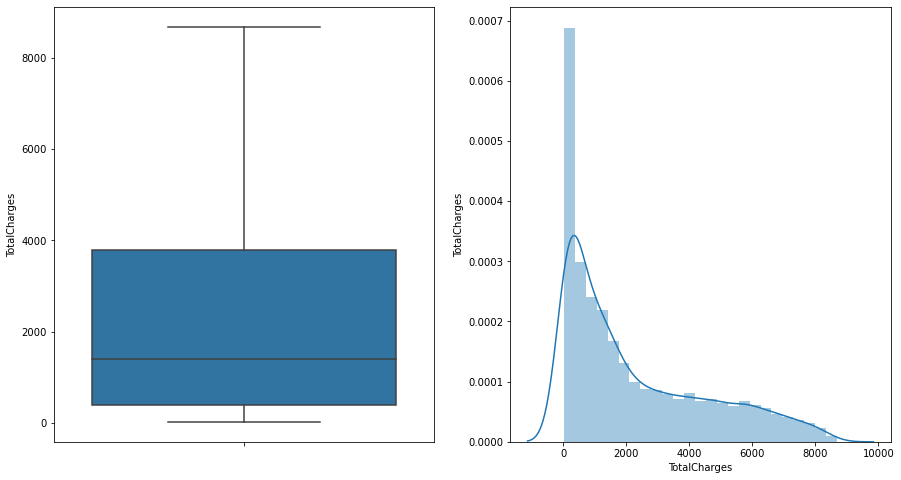

In [21]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(y = 'TotalCharges', data= data,ax=ax[0])
plt.ylabel('TotalCharges')
sns.distplot(data['TotalCharges'] ,ax=ax[1])
plt.xlabel('TotalCharges')
plt.show()

In [22]:
print("Mean of TotalCharges:",data['TotalCharges'].mean())
print("Median of TotalCharges:",data['TotalCharges'].median())

Mean of TotalCharges: 2283.3004408418697
Median of TotalCharges: 1397.475


No outliers present 'TotalCharges' feature is right skewed. Let's impute missing value with Mean.

### Missing value Imputation value in TotalCharges with Mean:

In [23]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [24]:
##Droping customerID
data.drop(['customerID'],axis=1,inplace=True)

In [25]:
##Numarical and Categorical Data
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [26]:
# spliting into Numerical & Categorical 
num_features = ['tenure','MonthlyCharges', 'TotalCharges']

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Exploratory Data Analysis(EDA)

### Categorical Data

In [29]:
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("-"*10)

Value counts of gender is---
 Male      3555
Female    3488
Name: gender, dtype: int64
----------
Value counts of SeniorCitizen is---
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------
Value counts of Partner is---
 No     3641
Yes    3402
Name: Partner, dtype: int64
----------
Value counts of Dependents is---
 No     4933
Yes    2110
Name: Dependents, dtype: int64
----------
Value counts of PhoneService is---
 Yes    6361
No      682
Name: PhoneService, dtype: int64
----------
Value counts of MultipleLines is---
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------
Value counts of InternetService is---
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------
Value counts of OnlineSecurity is---
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------
Value counts of OnlineBackup is

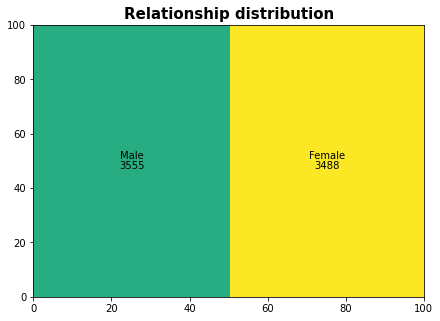

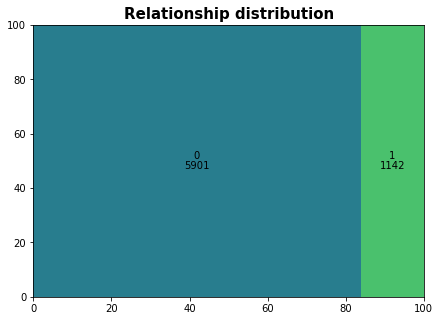

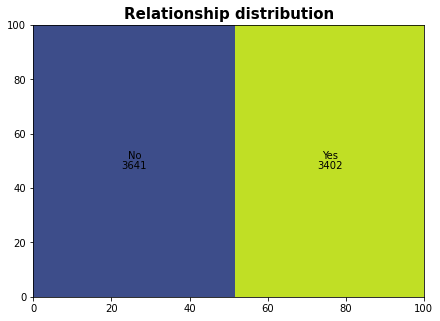

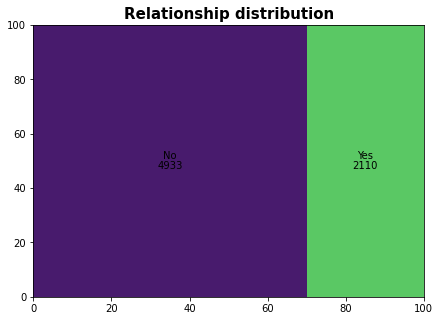

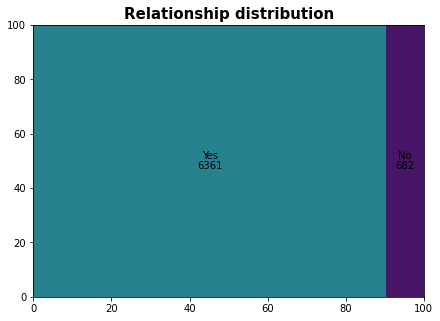

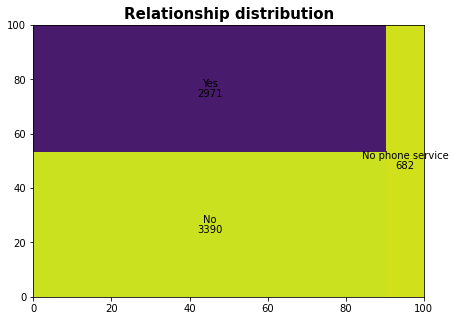

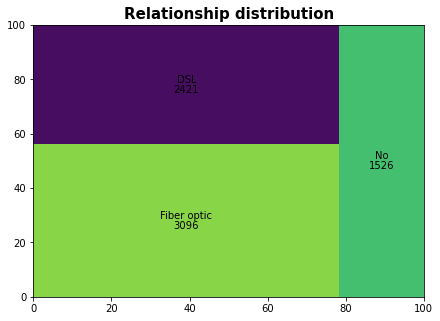

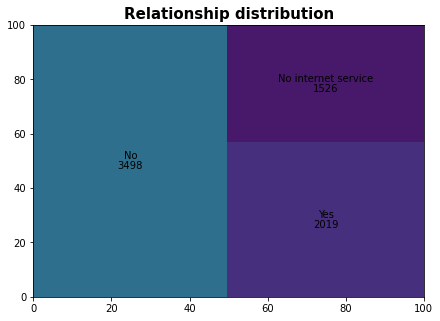

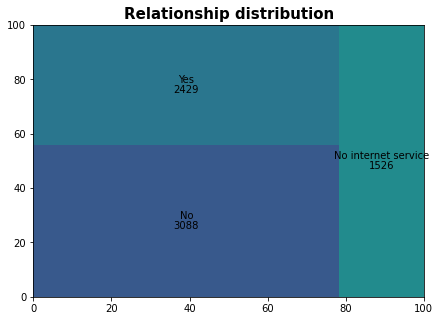

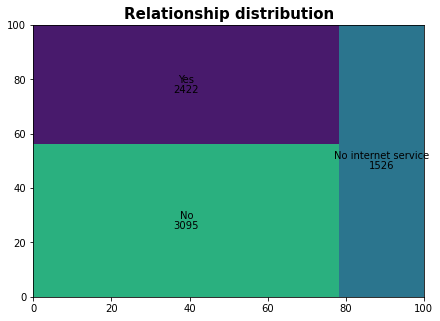

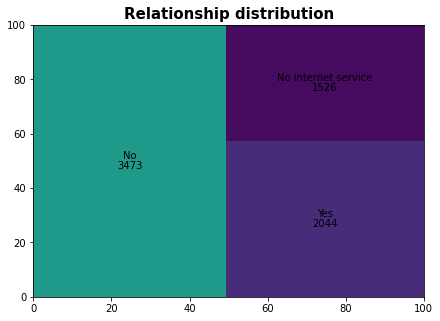

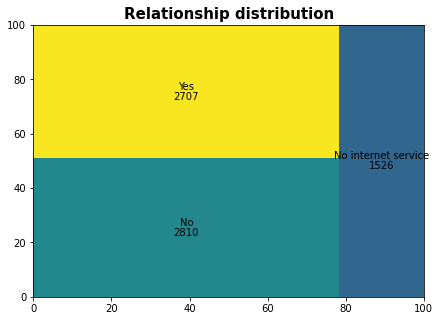

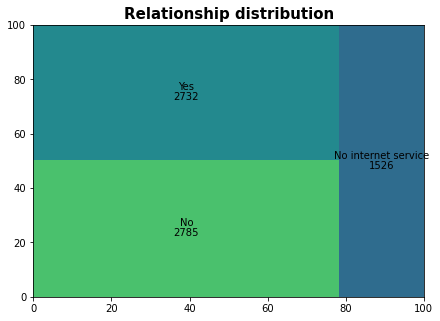

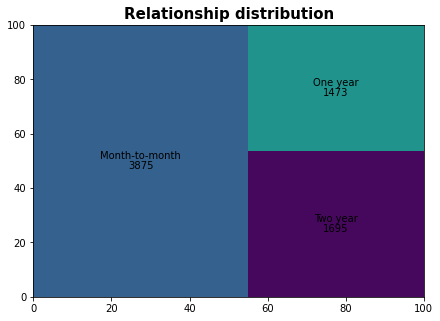

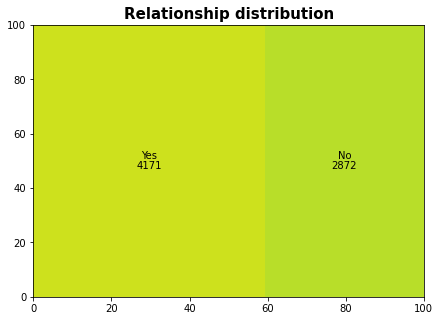

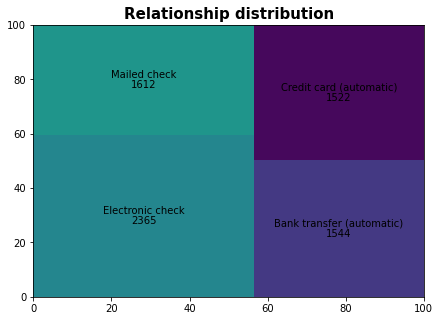

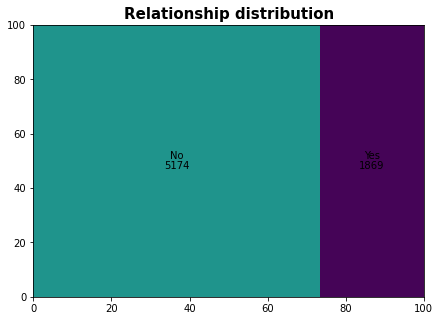

In [30]:
import squarify
for i in cat_features:
    plt.figure(figsize=(7, 5))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

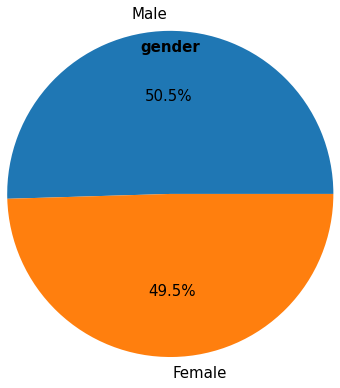

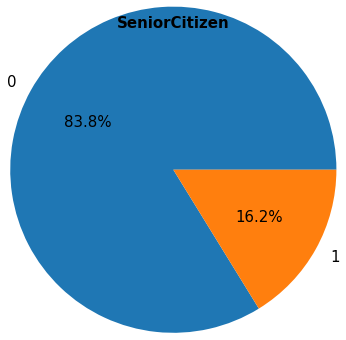

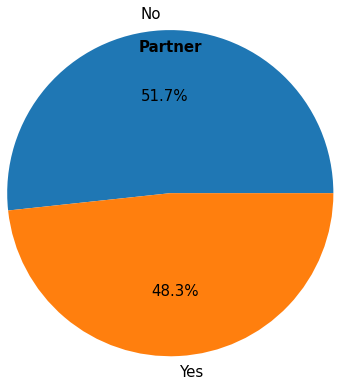

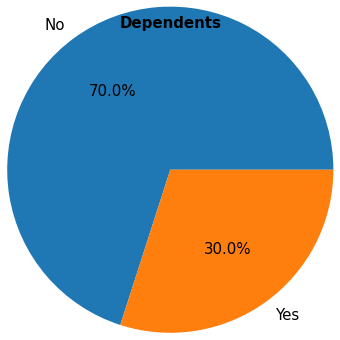

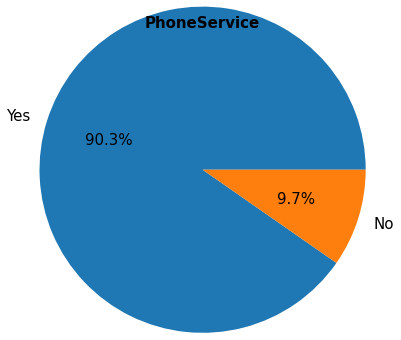

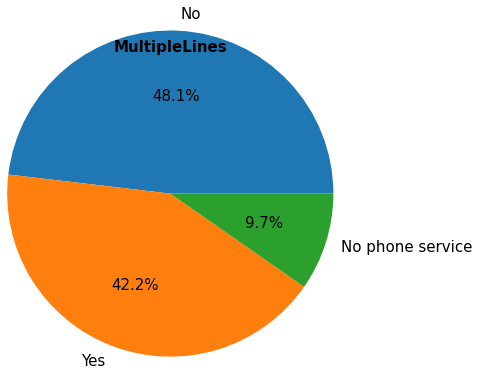

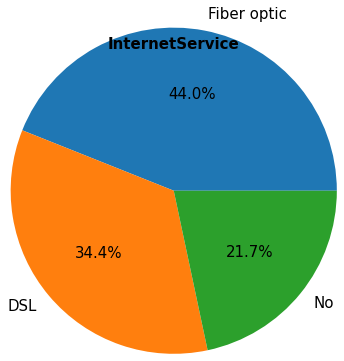

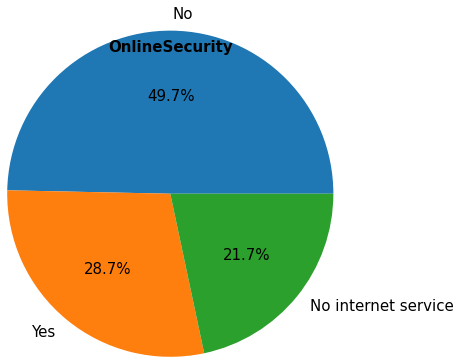

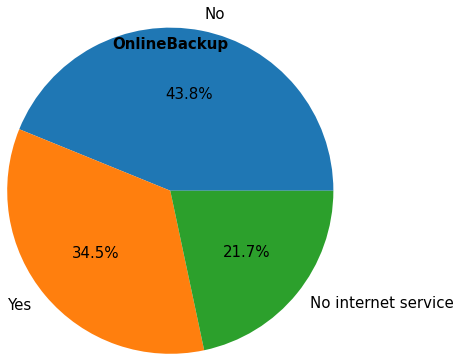

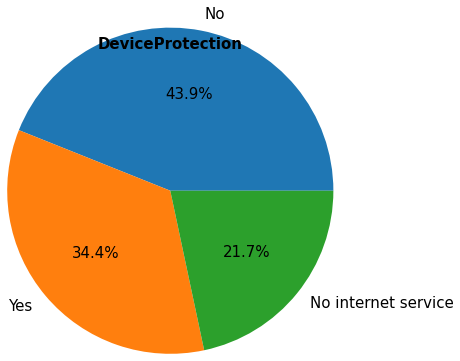

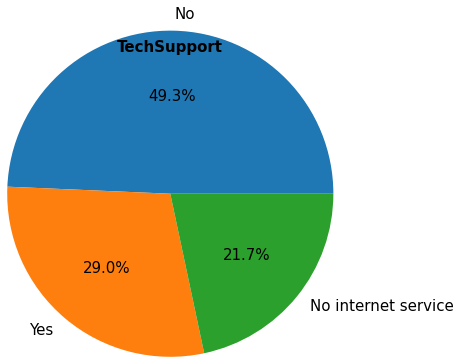

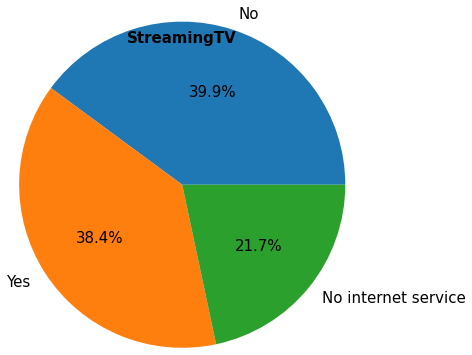

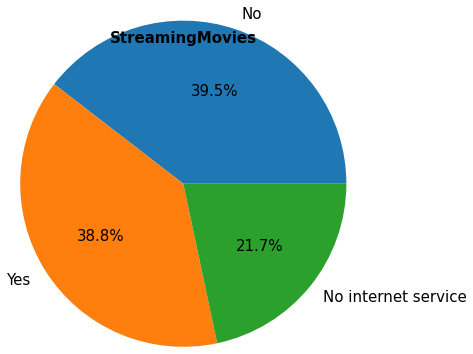

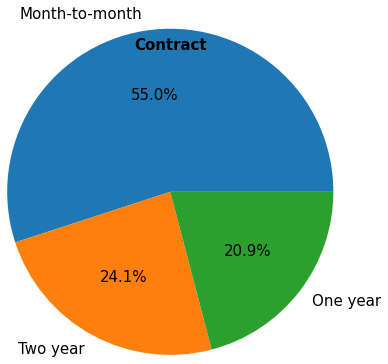

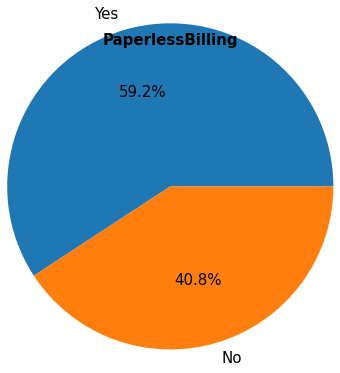

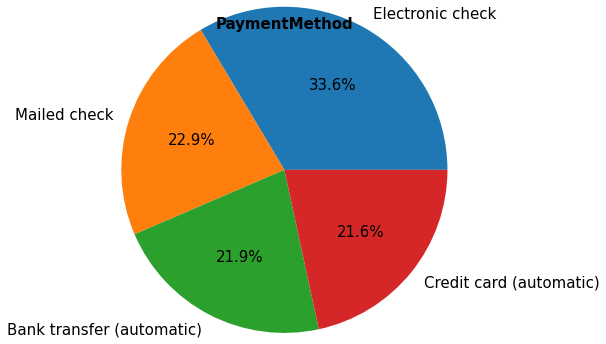

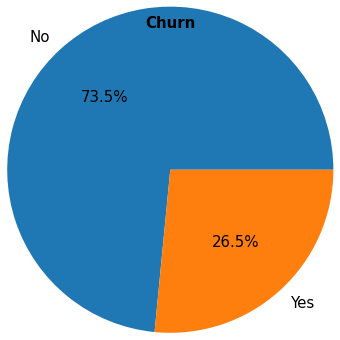

In [31]:
for i in cat_features:
    plt.figure(figsize=(5,5))
    data[i].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

Almost 55% customer perfer month to month contract compare to other.

60% Customer perfer paperless billing.

Around 50% customer are having partners.

Around 30% customer have dependents on them

Around 16% customer are Senior citizen

Most used payment method is electronic check.

The distribution of target variable is quite imbalance as there is a 75:25 relationship between NO:YES of tendency of churn.

### Numarical Data Analysis

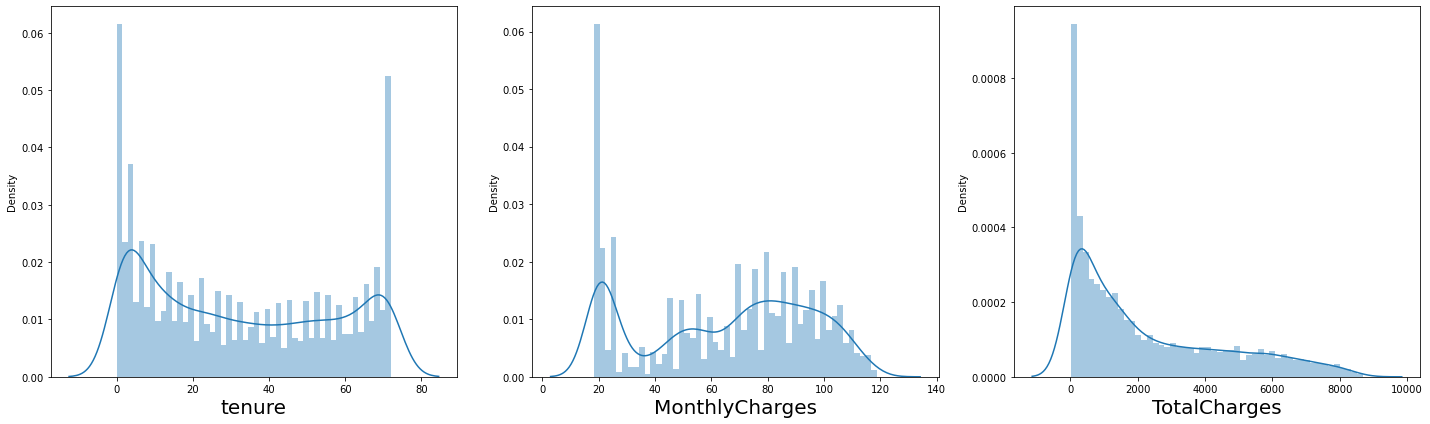

In [32]:
i=0
plt.figure(figsize=(20,6))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.distplot(data[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

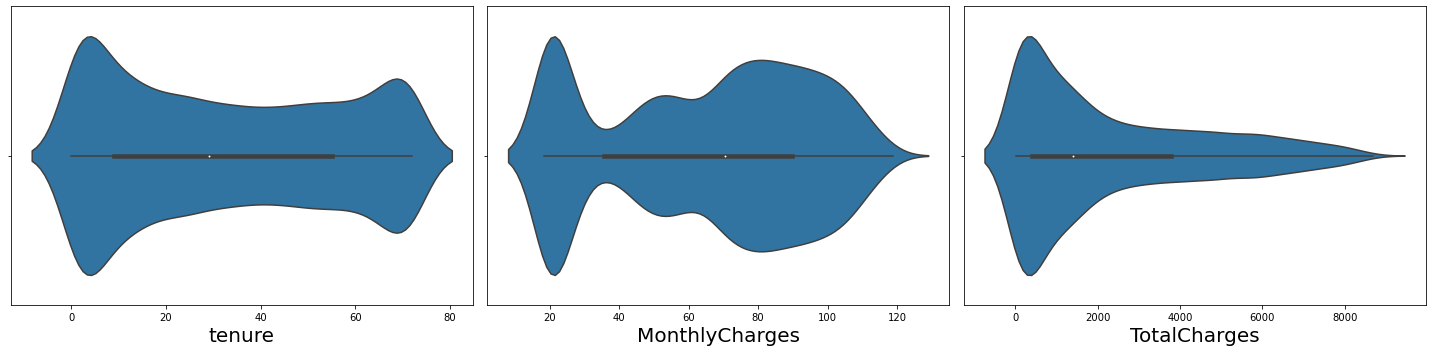

In [33]:
i=0
plt.figure(figsize=(20,5))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.violinplot(data[p])
    plt.xlabel(p,fontsize=20)
    i+=1 
plt.tight_layout()
plt.show()

All the data have right skewness

Avg range of age is 0-70

Monthly charges range is 20-120

0 value is present in TotalCharges column

### Analysis of Target variable

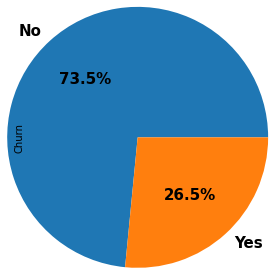

In [34]:
data['Churn'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

26.5 % customers Churn in last month.

73.5 % customers choose to continue the service in last month.

### Different feature's impact on target variable:

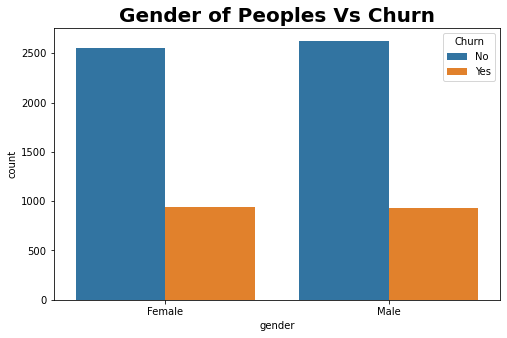

In [37]:
##Gender vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['gender'], hue= data['Churn'])
plt.title('Gender of Peoples Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [38]:
pd.crosstab(data['Churn'],data["gender"], margins= True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


The distribution of Churn is same with small difference

Male, YES: NO= 26:74 and for Female, YES: NO= 27:73

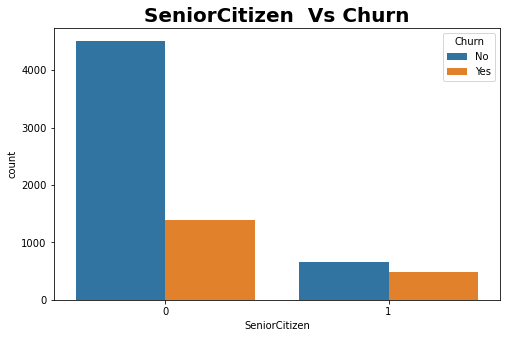

In [39]:
##Senior Citizen VS Churn
plt.figure(figsize=(8,5))
sns.countplot(data['SeniorCitizen'], hue= data['Churn'])
plt.title('SeniorCitizen  Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [40]:
pd.crosstab(data["SeniorCitizen"],data['Churn'], margins= True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [41]:
pd.crosstab([data.gender,data.SeniorCitizen ],data["Churn"],margins=True)

Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2221   699  2920
       1               328   240   568
Male   0              2287   694  2981
       1               338   236   574
All                   5174  1869  7043

Senior citizen have more churn with respect to others

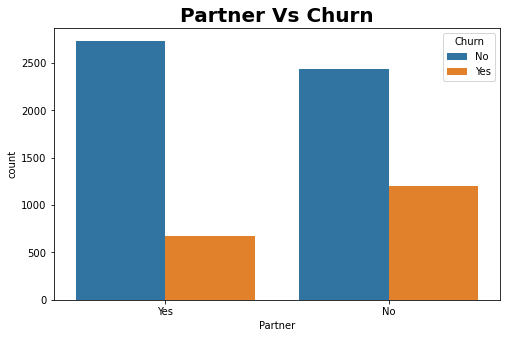

In [42]:
# Partner Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['Partner'], hue= data['Churn'])
plt.title('Partner Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [43]:
pd.crosstab([data.gender,data.Partner],data["Churn"],margins=True)

Churn             No   Yes   All
gender Partner                  
Female No       1180   620  1800
       Yes      1369   319  1688
Male   No       1261   580  1841
       Yes      1364   350  1714
All             5174  1869  7043

Customer having Partner have less tendency to Churn.

The customer not having partner have more tendency to Churn with respect to the customer who have their partner.

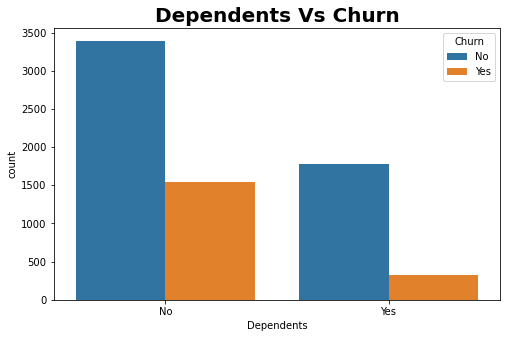

In [44]:
###Dependents Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['Dependents'], hue= data['Churn'])
plt.title('Dependents Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [45]:
pd.crosstab([data.Dependents],data["Churn"],margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


30% customers who doesn't have dependents are tendency to Churn.
For all dependent customers around 85 % customers are more tendency to Churn.

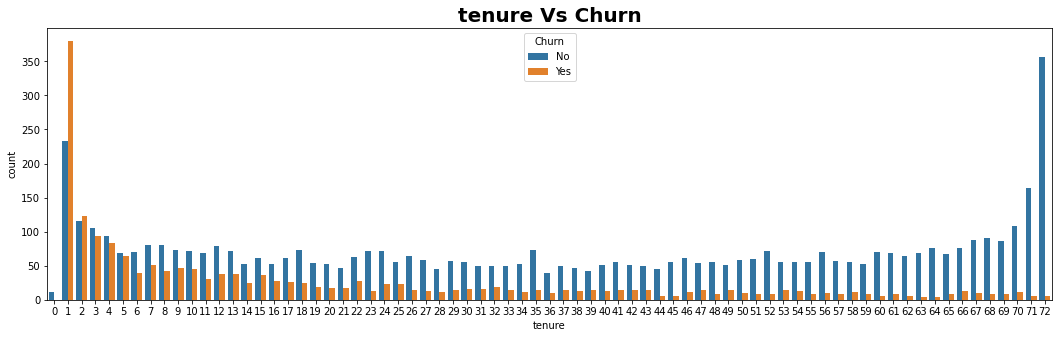

In [46]:
##Tenure vs Churn
plt.figure(figsize=(18,5))
sns.countplot(data['tenure'], hue= data['Churn'])
plt.title('tenure Vs Churn', fontsize=20, fontweight='bold')
plt.show()

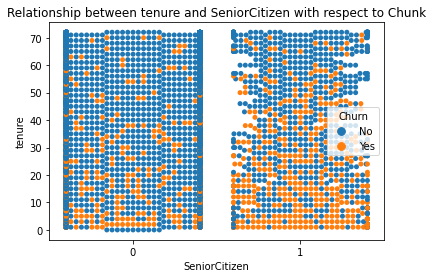

In [47]:
plt.title("Relationship between tenure and SeniorCitizen with respect to Chunk")
sns.swarmplot(x = "SeniorCitizen",y="tenure",data = data, hue= "Churn")
plt.show()

No clear relationship between SeniorCitizen and tenure.
Here for the tenure 1, the number of customer with the tendency to Churn is much greater than the number of customer who have no tendency to Churn.

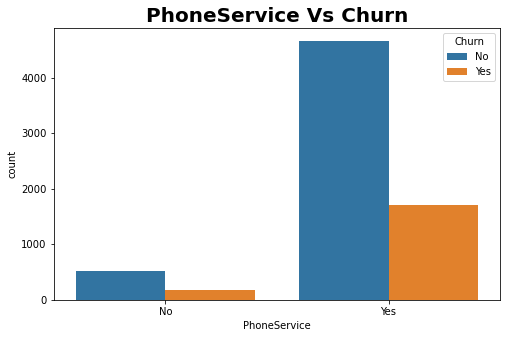

In [48]:
##Phone service vs churn
plt.figure(figsize=(8,5))
sns.countplot(data['PhoneService'], hue= data['Churn'])
plt.title('PhoneService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [49]:
pd.crosstab([data.PhoneService],data["Churn"],margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


No such relationship between PhoneService and churn

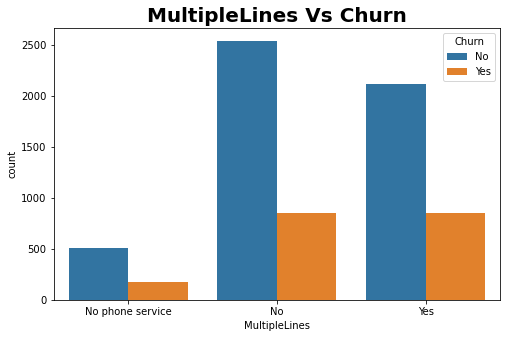

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data['MultipleLines'], hue= data['Churn'])
plt.title('MultipleLines Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [51]:
pd.crosstab([data.MultipleLines],data["Churn"],margins=True)

Churn,No,Yes,All
MultipleLines,,,
No,2541,849,3390
No phone service,512,170,682
Yes,2121,850,2971
All,5174,1869,7043


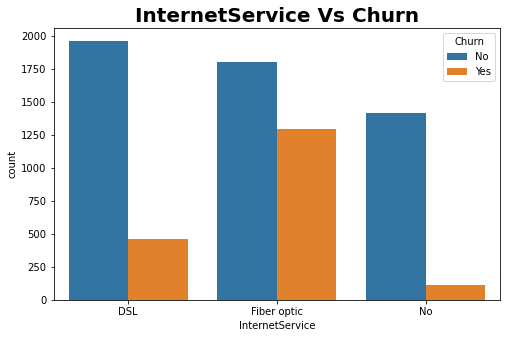

In [52]:
##Internet service vs churn
plt.figure(figsize=(8,5))
sns.countplot(data['InternetService'], hue= data['Churn'])
plt.title('InternetService Vs Churn', fontsize=20, fontweight='bold')
plt.show()

Total 3096 Fiber Optic connection, 1297 customer have tendency to Churn.
Mainly the positive Chunk are in the category with Fiber optic connection of internet service.


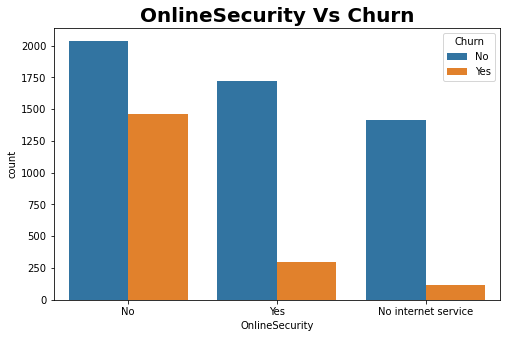

In [53]:
##Online security vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['OnlineSecurity'], hue= data['Churn'])
plt.title('OnlineSecurity Vs Churn', fontsize=20, fontweight='bold')
plt.show()

Customers without security have more tendency to Churn

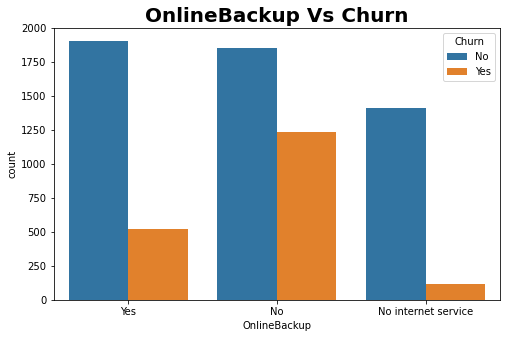

In [55]:
##OnlineBackup Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['OnlineBackup'], hue= data['Churn'])
plt.title('OnlineBackup Vs Churn', fontsize=20, fontweight='bold')
plt.show()

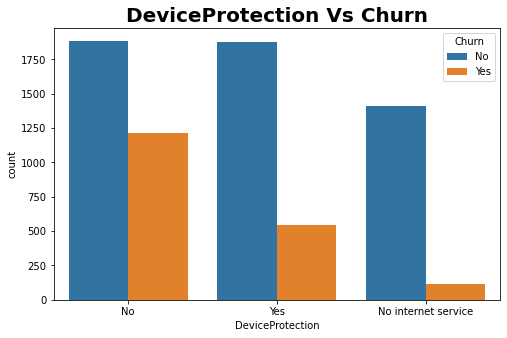

In [56]:
##Device protection vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['DeviceProtection'], hue= data['Churn'])
plt.title('DeviceProtection Vs Churn', fontsize=20, fontweight='bold')
plt.show()

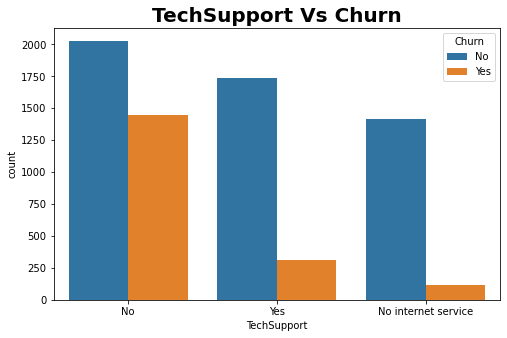

In [57]:
##echSupport Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['TechSupport'], hue= data['Churn'])
plt.title('TechSupport Vs Churn', fontsize=20, fontweight='bold')
plt.show()

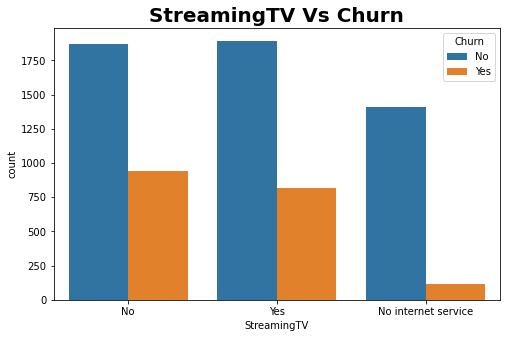

In [58]:
##StreamingTV Vs churn

plt.figure(figsize=(8,5))
sns.countplot(data['StreamingTV'], hue= data['Churn'])
plt.title('StreamingTV Vs Churn', fontsize=20, fontweight='bold')
plt.show()

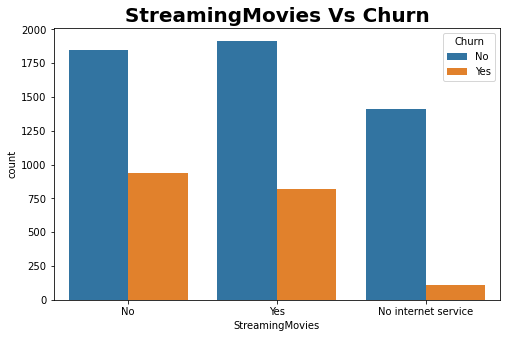

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(data['StreamingMovies'], hue= data['Churn'])
plt.title('StreamingMovies Vs Churn', fontsize=20, fontweight='bold')
plt.show()

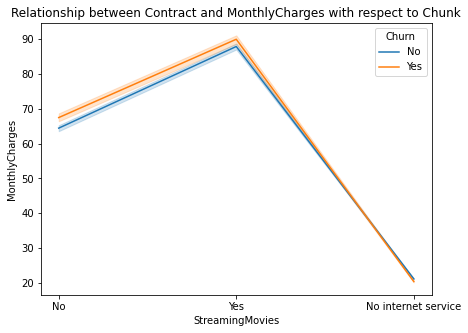

In [60]:
plt.figure(figsize=(7,5))
sns.lineplot(x="StreamingMovies", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

same churn in customers streaming Movies and not

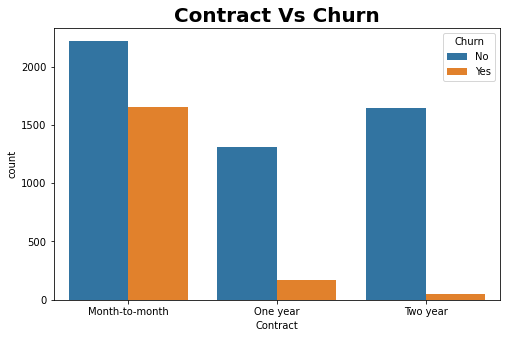

In [61]:
##Contract Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['Contract'], hue= data['Churn'])
plt.title('Contract Vs Churn', fontsize=20, fontweight='bold')
plt.show()

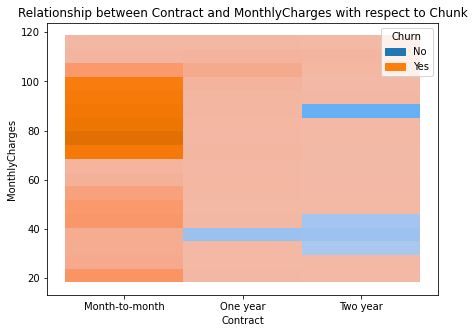

In [62]:
plt.figure(figsize=(7,5))
sns.histplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

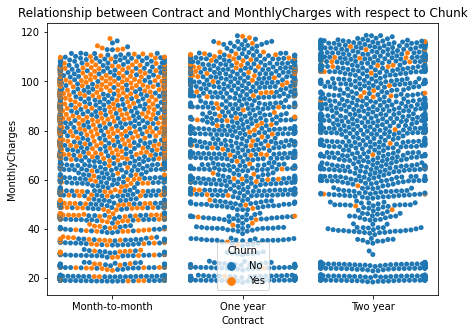

In [63]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

monthly subscribers having high churn rate in the customer.

No relation is found between MonthlyCharges and Contract.

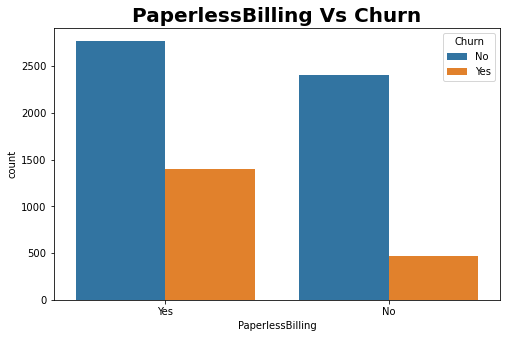

In [64]:
## Paperless Billing Vs Churn
plt.figure(figsize=(8,5))
sns.countplot(data['PaperlessBilling'], hue= data['Churn'])
plt.title('PaperlessBilling Vs Churn', fontsize=20, fontweight='bold')
plt.show()

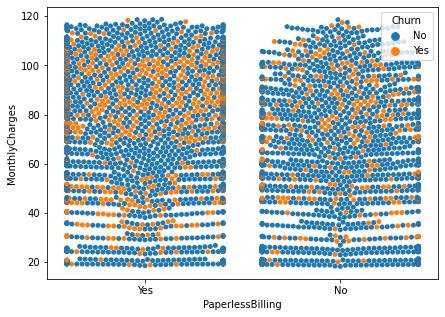

In [65]:
plt.figure(figsize=(7,5))
sns.swarmplot(x="PaperlessBilling", y='MonthlyCharges',data=data,hue="Churn")
plt.show()

The customers who prefer paperless billing they have high rate to churn.
No relation is found between MonthlyCharges and PaperlessBilling.

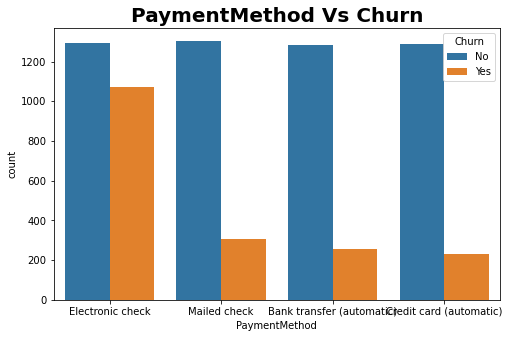

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(data['PaymentMethod'], hue= data['Churn'])
plt.title('PaymentMethod Vs Churn', fontsize=20, fontweight='bold')
plt.show()

high churn tendency in customer whoes payment method is Electronic check.

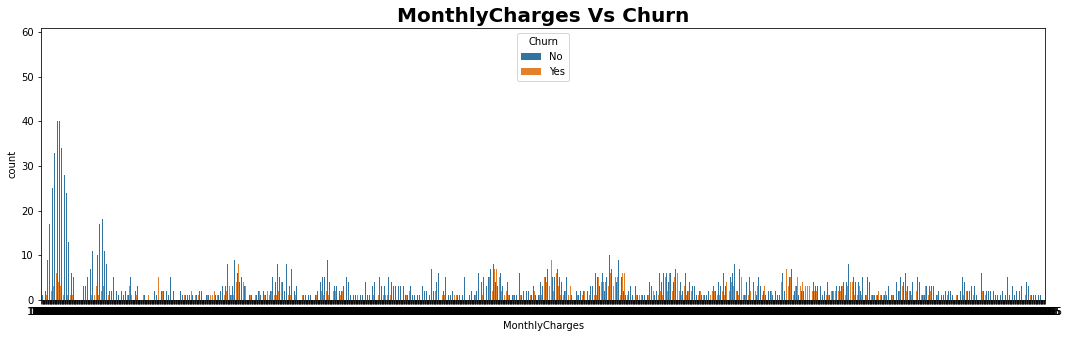

In [67]:
plt.figure(figsize=(18,5))
sns.countplot(data['MonthlyCharges'], hue= data['Churn'])
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

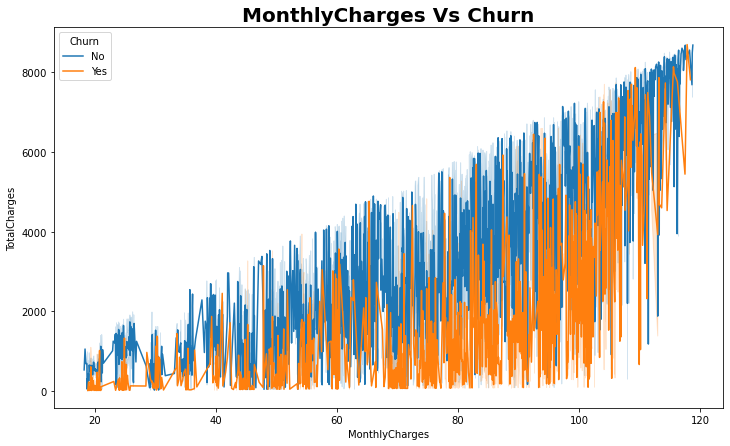

In [68]:
##TotalCharge Vs Churn

plt.figure(figsize=(12,7))
sns.lineplot(y="TotalCharges", x='MonthlyCharges',data=data,hue="Churn")
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

If MonthlyCharges is high, then the customers are more tendence to choose churn compare to rest.
Also if TotalCharges is high, then the customers are more tendence to choose churn compare to rest.

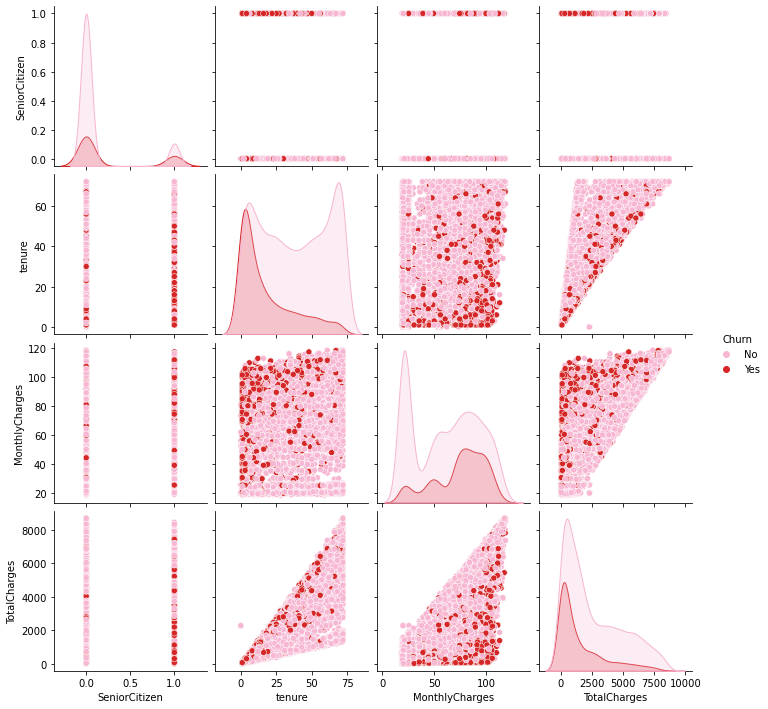

In [69]:
sns.pairplot(data,hue="Churn",palette="tab20_r")
plt.show()

There is no specific relationship from the above pairplot

### Correlation

In [70]:
data.corr().T

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


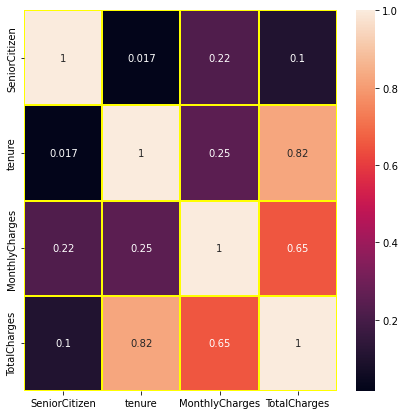

In [71]:
plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

##Correlation is high between total charges and tanure. But as we have only 3 numarical features at this time, let's encode the categorical features.

### Categorical features Encoding

###### label encoder

In [72]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Checking Correlation

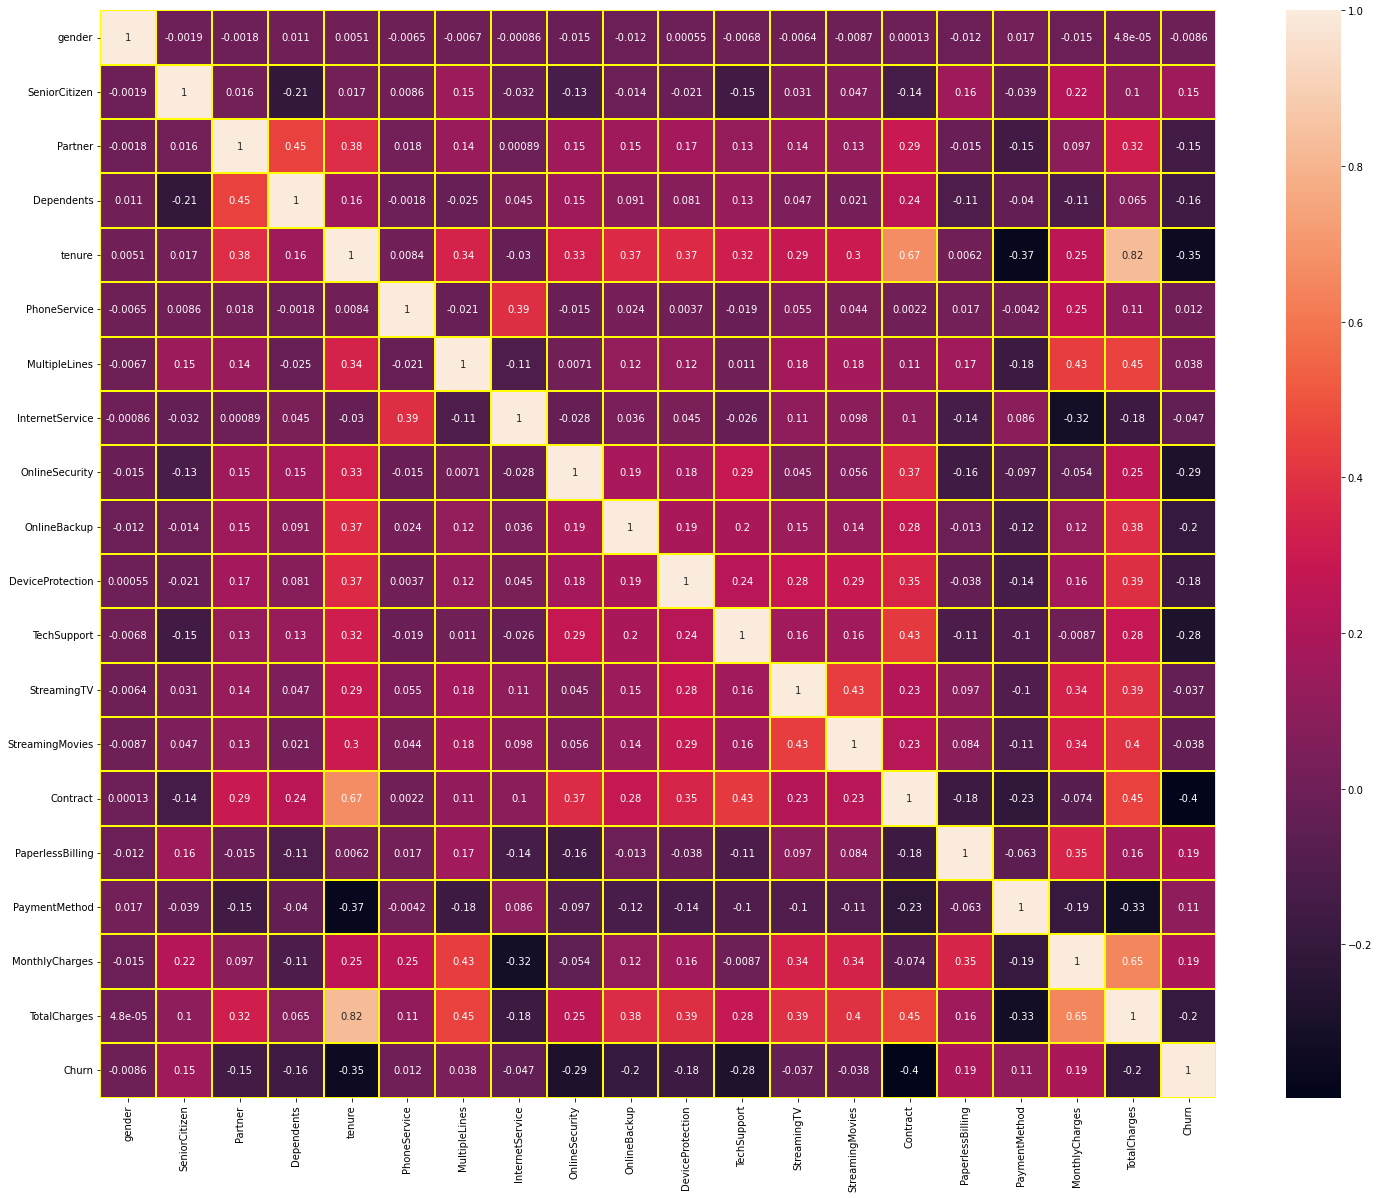

In [74]:
plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

### SalePrice(target variable)

<AxesSubplot:title={'center':'feature vs Churn corr'}>

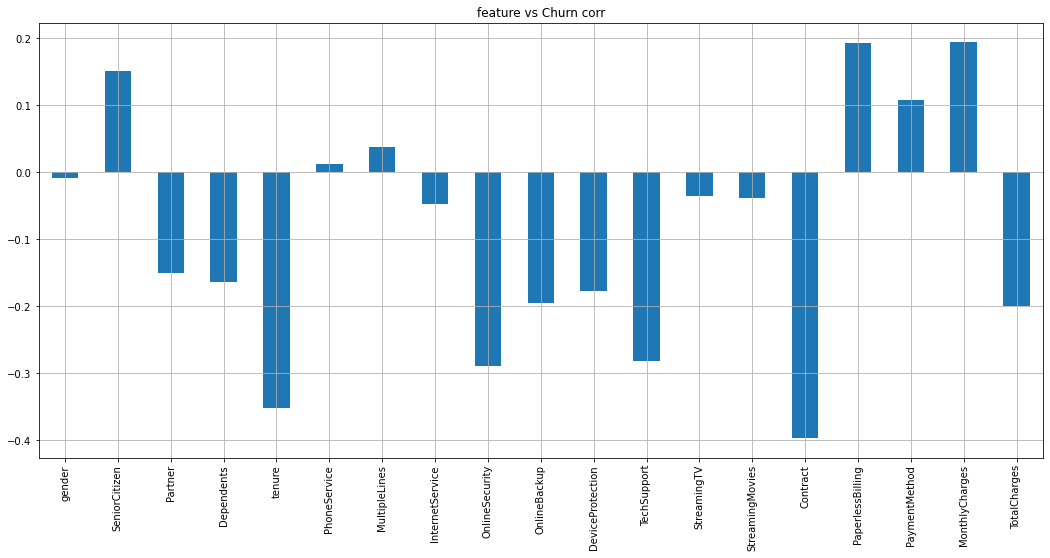

In [75]:
data.drop("Churn",axis=1).corrwith(data["Churn"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Churn corr')

Churn has a highly negetive relationship with Contract.
In other hand, paperless billing and monthly charges are positively correlated with churn.
All the features are correlated with each other

### Checking for Outliers

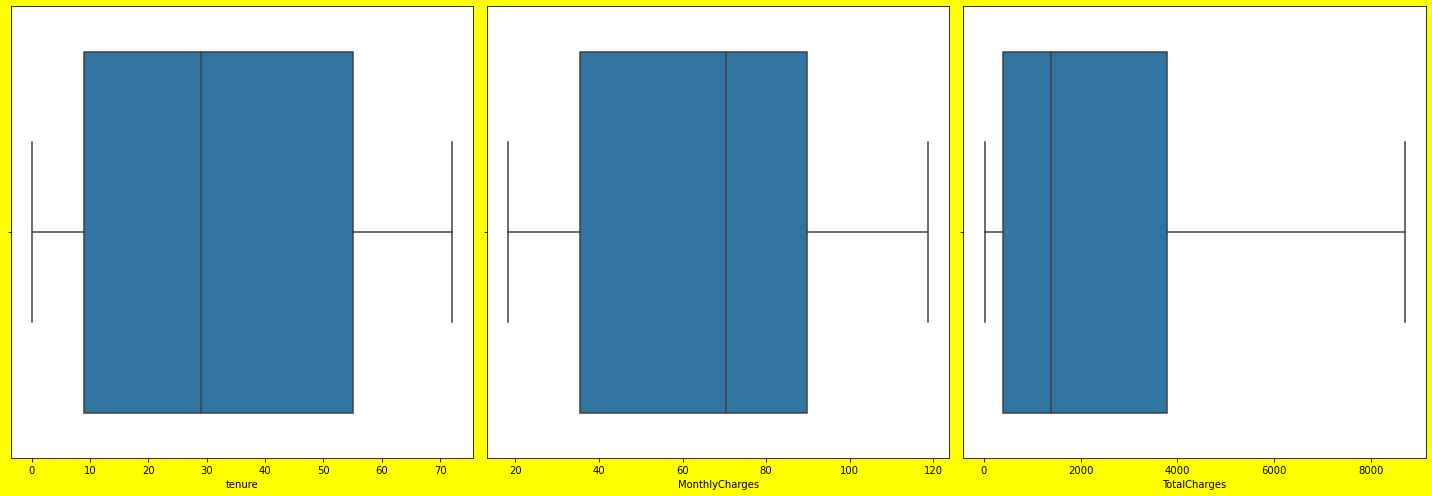

In [76]:
plt.figure(figsize=(20,7),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=3:
        ax=plt.subplot(1,3,pltno)
        sns.boxplot(data[x])
    pltno+=1
plt.tight_layout()
plt.show()

In [77]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

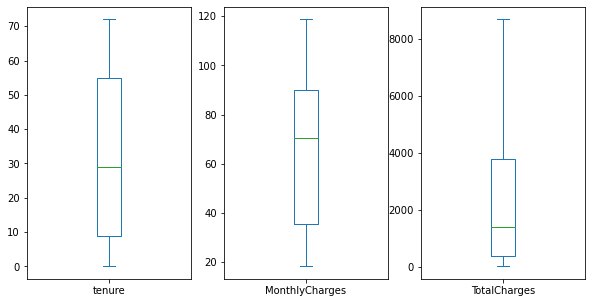

In [78]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind ='box', subplots =True , layout =(1,3), figsize = (10,5))
plt.show()

There is no outliers are present in the dataset

### Checking Skewness

In [79]:
data.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

In [80]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
dtype: float64

Except 3 features, all are categorical data. So let's ignore those skewness.

TotalCharges have some skewness, Need to remove the skewness.

In [82]:
data1= data.copy()

In [83]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [84]:
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']].values)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1


In [85]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges     -0.144899
tenure            0.239540
dtype: float64

### Balancing Imbalanced target feature(Churn) using SMOTE:

In [102]:
!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.3-cp39-cp39-win_amd64.whl (7.6 MB)


In [106]:
!pip install imblearn

In [110]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.9.1
    Uninstalling imbalanced-learn-0.9.1:
      Successfully uninstalled imbalanced-learn-0.9.1


  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\91741\appdata\roaming\python\python39\site-packages\scikit_learn-1.1.3.dist-info\
   from C:\Users\91741\AppData\Roaming\Python\Python39\site-packages\~cikit_learn-1.1.3.dist-info
  Moving to c:\users\91741\appdata\roaming\python\python39\site-packages\sklearn\
   from C:\Users\91741\AppData\Roaming\Python\Python39\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\91741\\AppData\\Local\\Temp\\pip-install-gbhcxjps\\scikit-learn_d4646c038ea64cd1a06dac634c2d1cf1\\setup.py'"'"'; __file__='"'"'C:\\Users\\91741\\AppData\\Local\\Temp\\pip-install-gbhcxjps\\scikit-learn_d4646c038ea64cd1a06dac634c2d1cf1\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\91741\AppData\Local\Temp\pip-wheel-zrvi2jh6'
       cwd: C:\Users\91741\AppData\Local\Temp\pip-install-gbhcxjps\scikit-learn_d4646c038ea64cd1a06dac634c2d1cf1\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompi

In [111]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [112]:
from imblearn.over_sampling import SMOTE
ovrs = SMOTE()

# Splitting data in target and features
x = data.drop(['Churn'], axis =1)
y = data['Churn']

In [113]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [114]:
x,y = ovrs.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
ovrs = SMOTE()

In [116]:
##Checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
vif["Features"] = data.columns
vif

,VIF,Features
0,1.992203,gender
1,1.372640,SeniorCitizen
2,2.821218,Partner
3,1.961200,Dependents
4,13.497891,tenure
5,16.014903,PhoneService
6,2.756853,MultipleLines
7,4.478147,InternetService
8,2.287594,OnlineSecurity
9,2.445350,OnlineBackup


Multicollinearity present between different features

### Principal Component Analysis (PCA) 

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

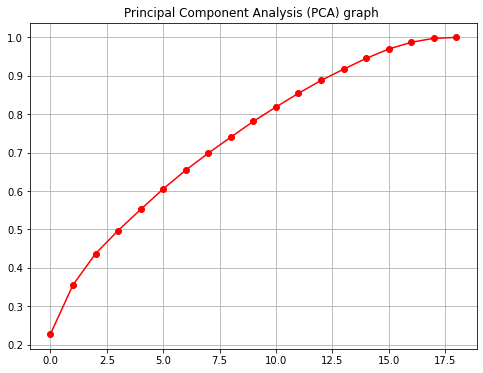

In [119]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

Around 95% variance gives the first 14 component. Let's take the first 14 components

In [120]:
pca_new = PCA(n_components=14)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.371405,0.827768,2.841556,0.002472,0.888456,-0.829060,1.370798,0.852378,-1.421494,-1.951059,-0.178727,-0.007794,0.121471,0.205500
1,-0.524999,1.603485,0.658476,0.786900,0.097691,1.214066,-1.014529,0.467881,0.258370,2.135313,0.621717,1.392663,-1.642905,-1.127971
2,-2.240862,0.932390,0.692454,-0.001426,0.171733,1.291231,-1.064853,2.619829,-0.317734,-0.140387,0.510100,-0.590562,-1.436041,0.273507
3,0.764935,2.365432,3.310757,2.199242,0.138831,1.085827,-0.762969,-1.469585,0.885483,0.348834,-0.524778,0.950728,-0.259343,0.870320
4,-2.966006,-0.417482,-0.201766,-0.231561,-0.893023,-0.511748,-0.100167,0.565904,0.564718,-0.399568,-0.130561,0.332669,0.016917,-0.583930


### Using different Classification ML Models

In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(400, 1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8074990336296869 on Random_state 1168


### Here the best accuracy on Random_state=1168

In [122]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7761, 14)
Training target shape: (7761,)
Test feature shape: (2587, 14)
Test target shape: (2587,)


### LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=1261)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.8001546192500967
cof_mat:
  [[ 997  295]
 [ 222 1073]]
classification report:
                precision    recall  f1-score   support

           0       0.82      0.77      0.79      1292
           1       0.78      0.83      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.778636773611648
testing score :  0.8001546192500967


### Use GridSearchCV for hyperparameter tuning

In [124]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.001, 'max_iter': 140, 'penalty': 'l2', 'solver': 'sag'}


In [125]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.7974487823734054
cof_mat:

  [[ 974  318]
 [ 206 1089]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.75      0.79      1292
           1       0.77      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7795387192372117
testing score :  0.7974487823734054


R2 score not improved after using gridsearchCV 

### Using DecisionTreeClassifier

In [126]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.7669114804793197


cof_mat:  [[ 958  334]
 [ 269 1026]]


classification report: 

               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1292
           1       0.75      0.79      0.77      1295

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.7669114804793197


### Use GridSearchCV for hyperparameter tuning

In [127]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 3, 'splitter': 'best'}


In [128]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.7816003092385002


cof_mat:  [[ 982  310]
 [ 255 1040]]


classification report: 

               precision    recall  f1-score   support

           0       0.79      0.76      0.78      1292
           1       0.77      0.80      0.79      1295

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

-----------
-----------
training score :  0.8062105398788816
testing score :  0.7816003092385002


The difference between training score, testing score is also decreased.
Accuracy score is slightly improved after using GridSearchCV with DecisionTreeClassifier

### Using GradientBoostingClassifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8148434480092771


cof_mat:  [[1002  290]
 [ 189 1106]]


classification report: 

               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1292
           1       0.79      0.85      0.82      1295

    accuracy                           0.81      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.81      0.81      2587

-----------
-----------
training score :  0.8218013142636258
testing score :  0.8148434480092771


### Using Gridsearch CV

In [132]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [133]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8140703517587939


cof_mat:  [[1000  292]
 [ 189 1106]]


classification report:

                precision    recall  f1-score   support

           0       0.84      0.77      0.81      1292
           1       0.79      0.85      0.82      1295

    accuracy                           0.81      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.81      0.81      2587

-----------
-----------
training score :  0.8218013142636258
testing score :  0.8140703517587939


No improvement in Accuracy score, training score, testing score after using GridSearchCV with GradientBoostingClassifier()

### Using RandomForestClassifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8233475067645922


cof_mat:  [[1062  230]
 [ 227 1068]]


classification report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.82      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8233475067645922


### Use GridSearchCV for hyperparameter tuning

In [137]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 150}


In [138]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.8237340548898338


cof_mat:  [[1052  240]
 [ 216 1079]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.82      0.83      0.83      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.960185543100116
testing score :  0.8237340548898338


Accuracy score is improved after using GridSearchCV with RandomForestClassifier

### ExtraTreesClassifier

In [140]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8210282180131426


cof_mat:  [[1065  227]
 [ 236 1059]]


classification report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.82      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8210282180131426


### Using GridSearchCV for hyperparameter tuning

In [141]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 150}


In [142]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8268264398917665


cof_mat:  [[1055  237]
 [ 211 1084]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1292
           1       0.82      0.84      0.83      1295

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

-----------
-----------
training score :  0.9729416312330885
testing score :  0.8268264398917665


Accuracy slightly improved after using GridSearchCV with ExtraTreesClassifie

### Using AdaBoostClassifier

In [143]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.7962891379976808


cof_mat:  [[ 996  296]
 [ 231 1064]]


classification report:                precision    recall  f1-score   support

           0       0.81      0.77      0.79      1292
           1       0.78      0.82      0.80      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7921659579951037
testing score :  0.7962891379976808


### Using GridSearchCV for hyperparameter tuning

In [144]:
params = {'n_estimators' : [50,40, 60], 'learning_rate': [1,0.1,0.01] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [145]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.8013142636258214


cof_mat:  [[1002  290]
 [ 224 1071]]


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1292
           1       0.79      0.83      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7943563973714728
testing score :  0.8013142636258214


no improvement in Accuracy after using GridSearchCV with AdaBoostClassifier

### Using SVC('rbf')

In [146]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [147]:
svmkernel('rbf')

accu score :  0.8144568998840356


cof_mat:  [[1014  278]
 [ 202 1093]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1292
           1       0.80      0.84      0.82      1295

    accuracy                           0.81      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.81      0.81      2587

-----------
-----------
training score :  0.803633552377271
testing score :  0.8144568998840356


### Using SVC ('linear')

In [148]:
svmkernel('linear')

accu score :  0.7974487823734054


cof_mat:  [[ 980  312]
 [ 212 1083]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1292
           1       0.78      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7801829661126144
testing score :  0.7974487823734054


In [149]:
svmkernel('poly')

accu score :  0.7866254348666409


cof_mat:  [[ 890  402]
 [ 150 1145]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.69      0.76      1292
           1       0.74      0.88      0.81      1295

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.78      2587
weighted avg       0.80      0.79      0.78      2587

-----------
-----------
training score :  0.7720654554825409
testing score :  0.7866254348666409


##### Best accuracy - RandomforestClassifier

### Cross Validtion

In [150]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.75591616 0.74780257 0.77198917 0.80649526 0.80514208 0.8173207
 0.83558863]

Mean CV Score : 0.7914649411628775

Std deviation : 0.030654339168210958

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='auto', min_samples_split=3)

 Cross Validation Score :  [0.75659229 0.74442191 0.78416779 0.78958051 0.79769959 0.8240866
 0.82002706]

Mean CV Score : 0.7880822526388186

Std deviation : 0.027580243136944137

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.76064909 0.7464503  0.80311231 0.84370771 0.84912043 0.86265223
 0.87009472]

Mean CV Score : 0.819398115272426

Std deviation : 0.04621919228202627

-----------
-----------
Cross Validation Score of : RandomForestClassifier(min_samples_leaf=3, n_estimators=150)

 Cross Validation Score :  [0.772

###### RandomforestClassifier gives good accuracy and maximum f1 score along with a good Cross-validation score

#### Plotting ROC AUC Curve to choose best model

In [151]:
log.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [152]:
log.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


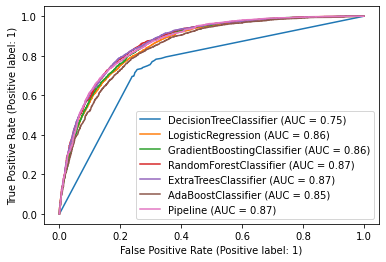

In [153]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

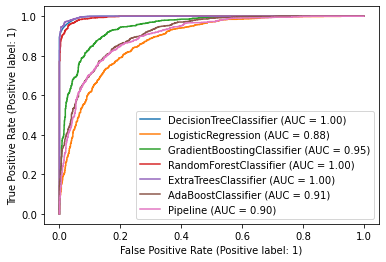

In [154]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

So Randomforest is the final model for this dataset

In [155]:
grid_rf_best.fit(x_train, y_train)
y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.822574410514109


cof_mat:  [[1051  241]
 [ 218 1077]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.82      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9607009406004381
testing score :  0.822574410514109


### Confusion matrix

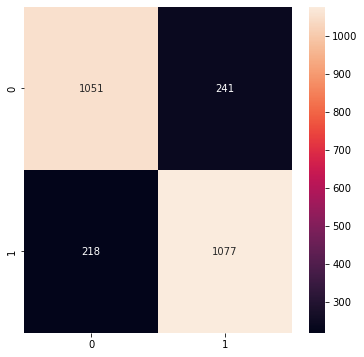

In [156]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Saving the Model

In [157]:
import pickle
pickle.dump(grid_etc_best, open("Customer_Churn_Classification_model", "wb"))
load_Customer_Churn_Classification_model= pickle.load(open("Customer_Churn_Classification_model", "rb"))

In [158]:
y_pred = load_Customer_Churn_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
443,0,0
2360,1,1
716,1,1
584,1,1
1219,1,1
1234,0,0


In [159]:
##Feature importance
feature= x.columns

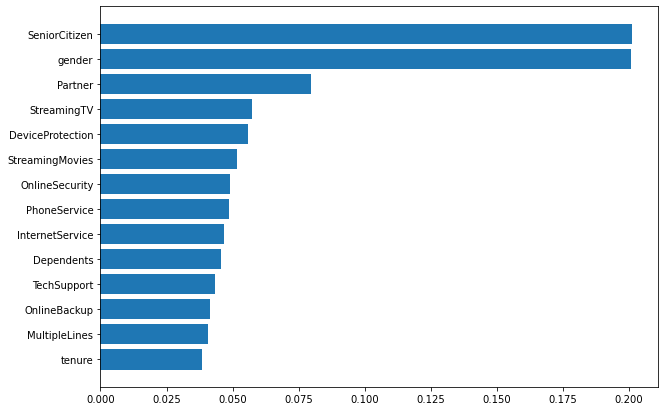

In [160]:
fimp = list(zip(feature,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

##### Most importance feature amomg all for this dataset is "Senior Citizen" & "Gender"

# Thank You